In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
names_col = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
             'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
             'hours_per_week', 'native_country', 'income']
df = pd.read_csv("datafiles/adult1.csv", names=names_col)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32562 non-null  object
 1   workclass       32562 non-null  object
 2   fnlwgt          32562 non-null  object
 3   education       32562 non-null  object
 4   education_num   32562 non-null  object
 5   marital_status  32562 non-null  object
 6   occupation      32562 non-null  object
 7   relationship    32562 non-null  object
 8   race            32562 non-null  object
 9   sex             32562 non-null  object
 10  capital_gain    32562 non-null  object
 11  capital_loss    32562 non-null  object
 12  hours_per_week  32562 non-null  object
 13  native_country  32562 non-null  object
 14  income          32562 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [11]:
df.shape

(32561, 15)

In [17]:
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education_num     0.0 %
marital_status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital_gain      0.0 %
capital_loss      0.0 %
hours_per_week    0.0 %
native_country    0.0 %
income            0.0 %
dtype: object

In [9]:
df['income'].value_counts()

<=50K     24720
>50K       7841
income        1
Name: income, dtype: int64

In [23]:
df['income'].value_counts(normalize=True)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

#### * Conclusion: Inbalance Dataset

In [28]:
income = df['income'].value_counts()

income.values, income.index

(array([24720,  7841], dtype=int64),
 Index([' <=50K', ' >50K'], dtype='object'))

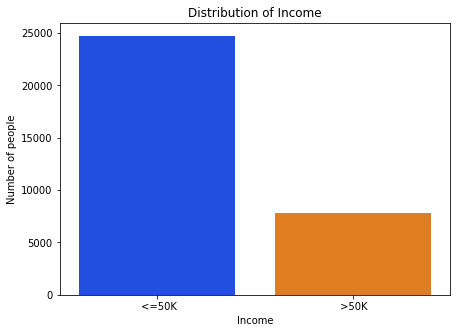

In [31]:
plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

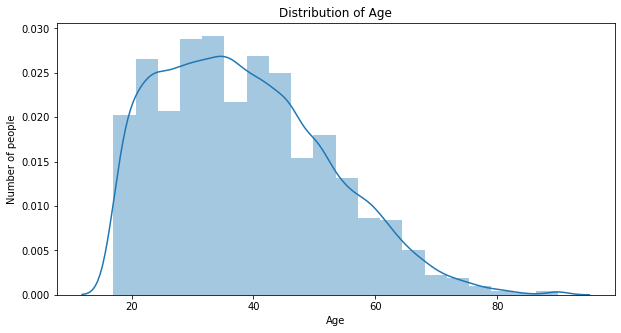

In [34]:
age = df['age'].value_counts()
plt.figure(figsize=(10, 5))
sns.distplot(df['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

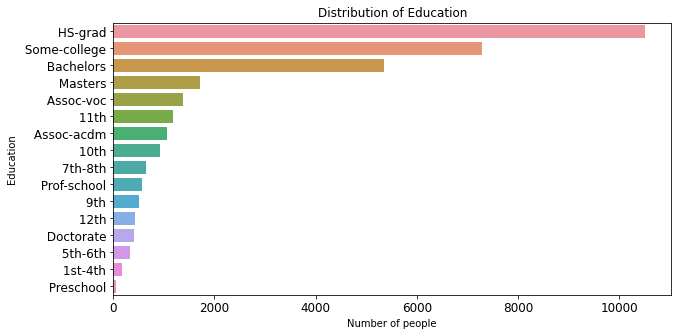

In [36]:
edu = df['education'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index)
plt.title('Distribution of Education')
plt.xlabel('Number of people')
plt.ylabel('Education')
plt.tick_params(labelsize=12)
plt.show()

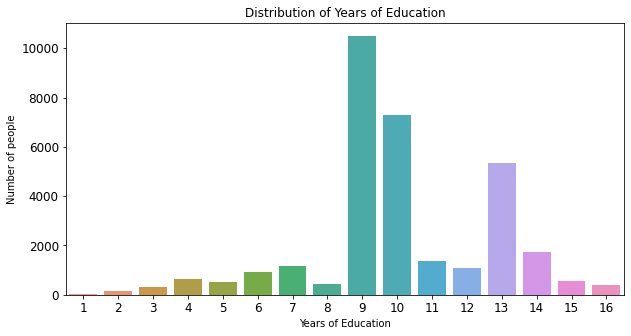

In [40]:
edu_num = df['education_num'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values)
plt.title('Distribution of Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.show()

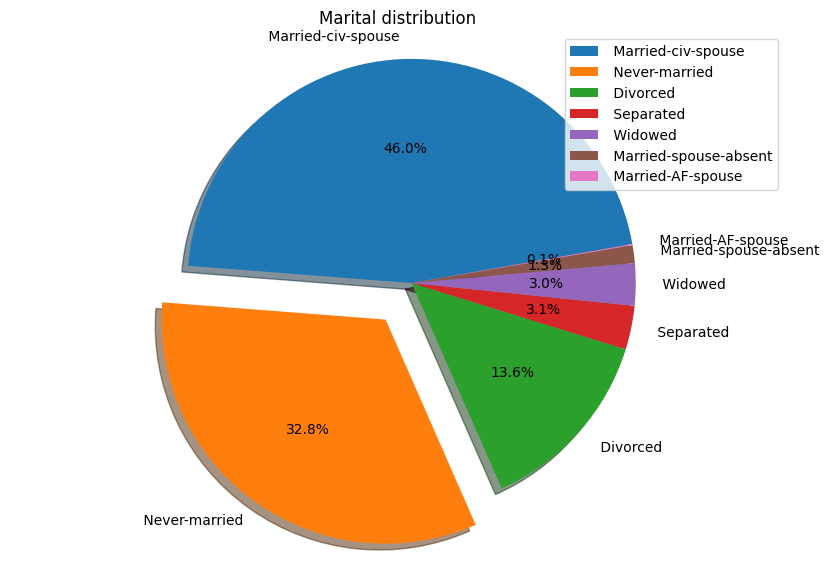

In [47]:
marital = df['marital_status'].value_counts()
plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, explode=(
    0, 0.20, 0, 0, 0, 0, 0), startangle=10,shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution')
plt.legend()
plt.legend(prop={'size': 10})
plt.axis('equal')
plt.show()

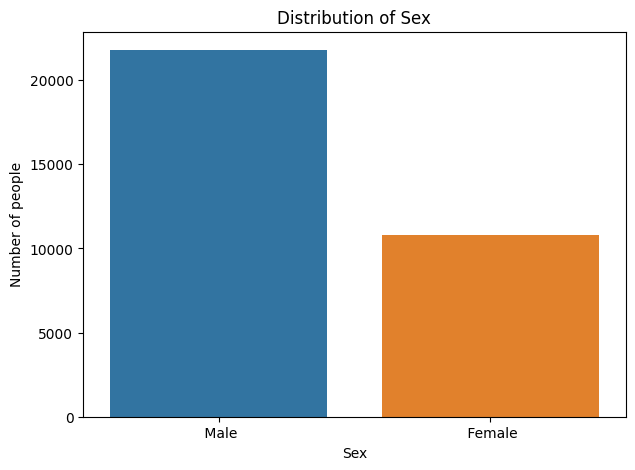

In [53]:
sex = df['sex'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.show()

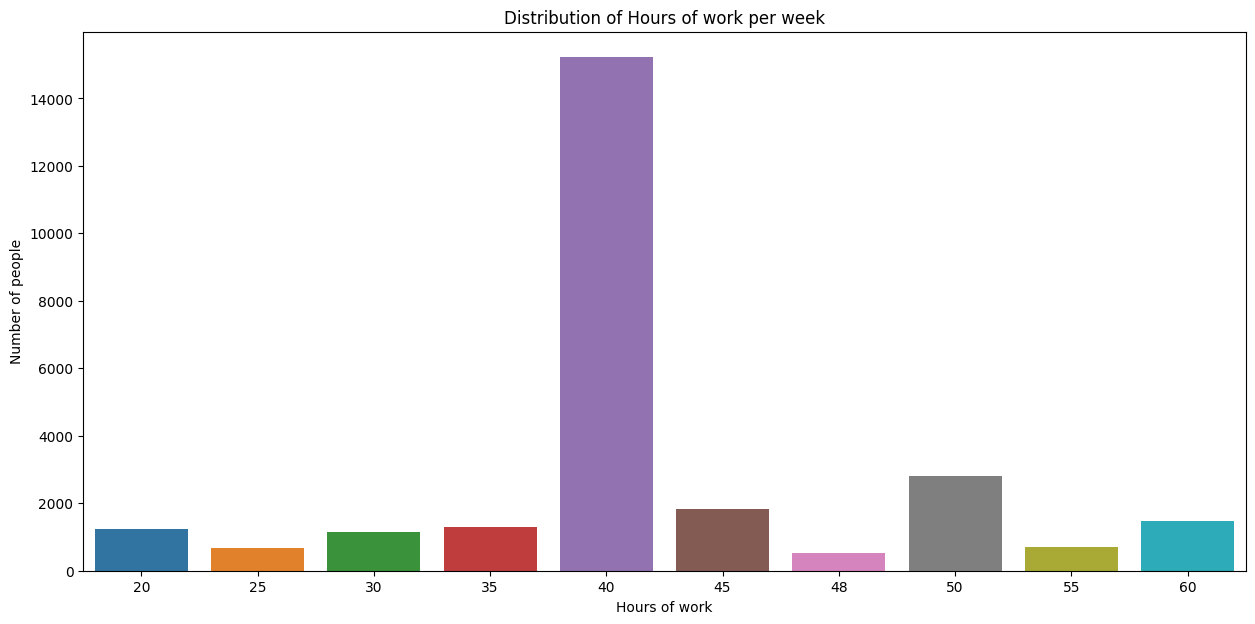

In [56]:
hours = df['hours_per_week'].value_counts().head(10)

plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values)
plt.title('Distribution of Hours of work per week')
plt.xlabel('Hours of work')
plt.ylabel('Number of people')
plt.show()

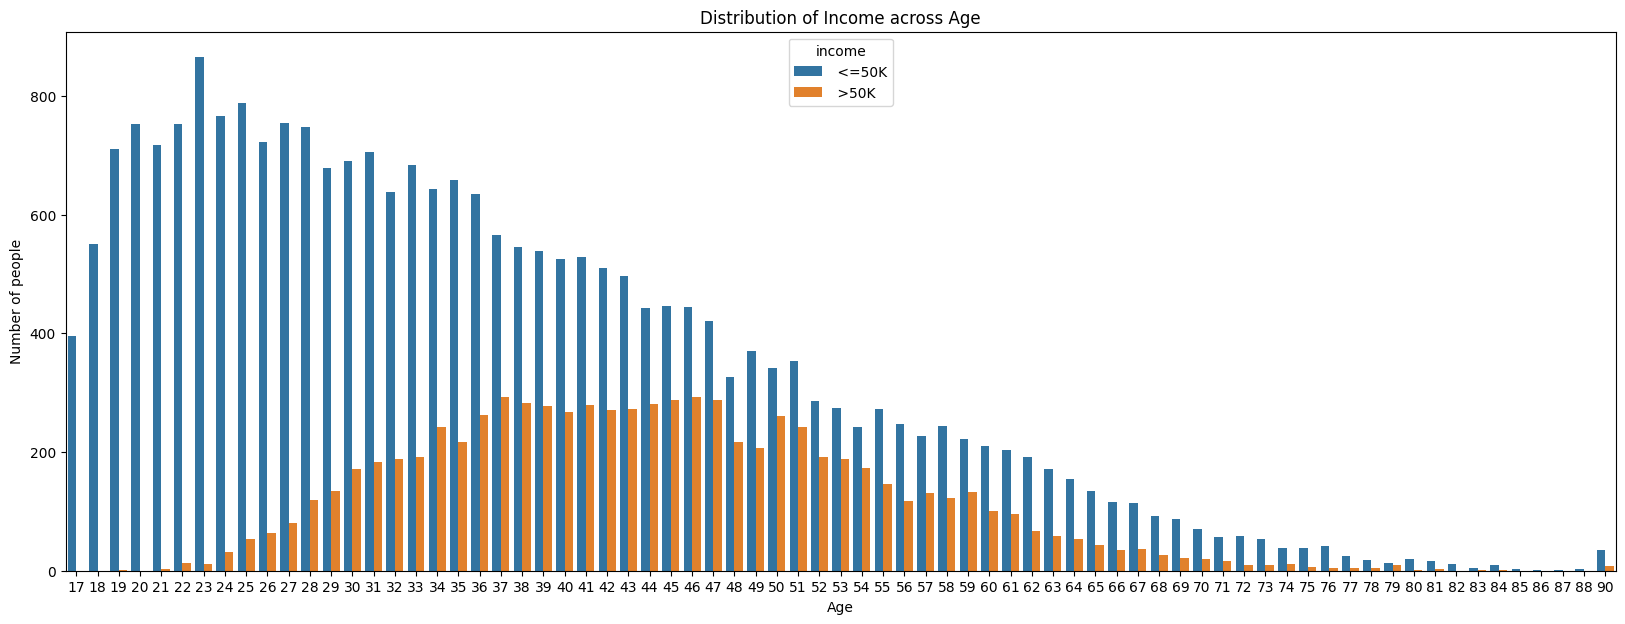

In [58]:
plt.figure(figsize=(20, 7))
sns.countplot(df['age'], hue=df['income'])
plt.title('Distribution of Income across Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

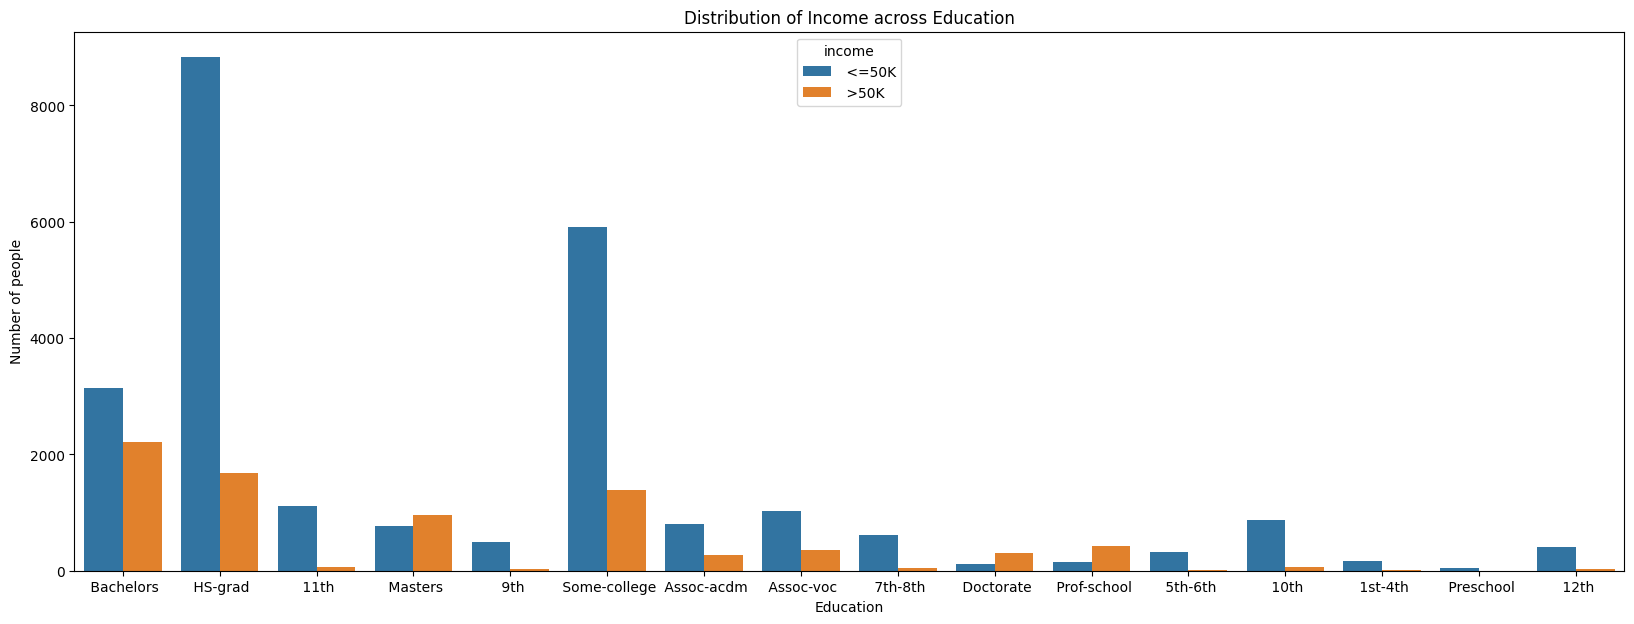

In [60]:
plt.figure(figsize=(20, 7))
sns.countplot(df['education'], hue=df['income'])
plt.title('Distribution of Income across Education')
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.show()

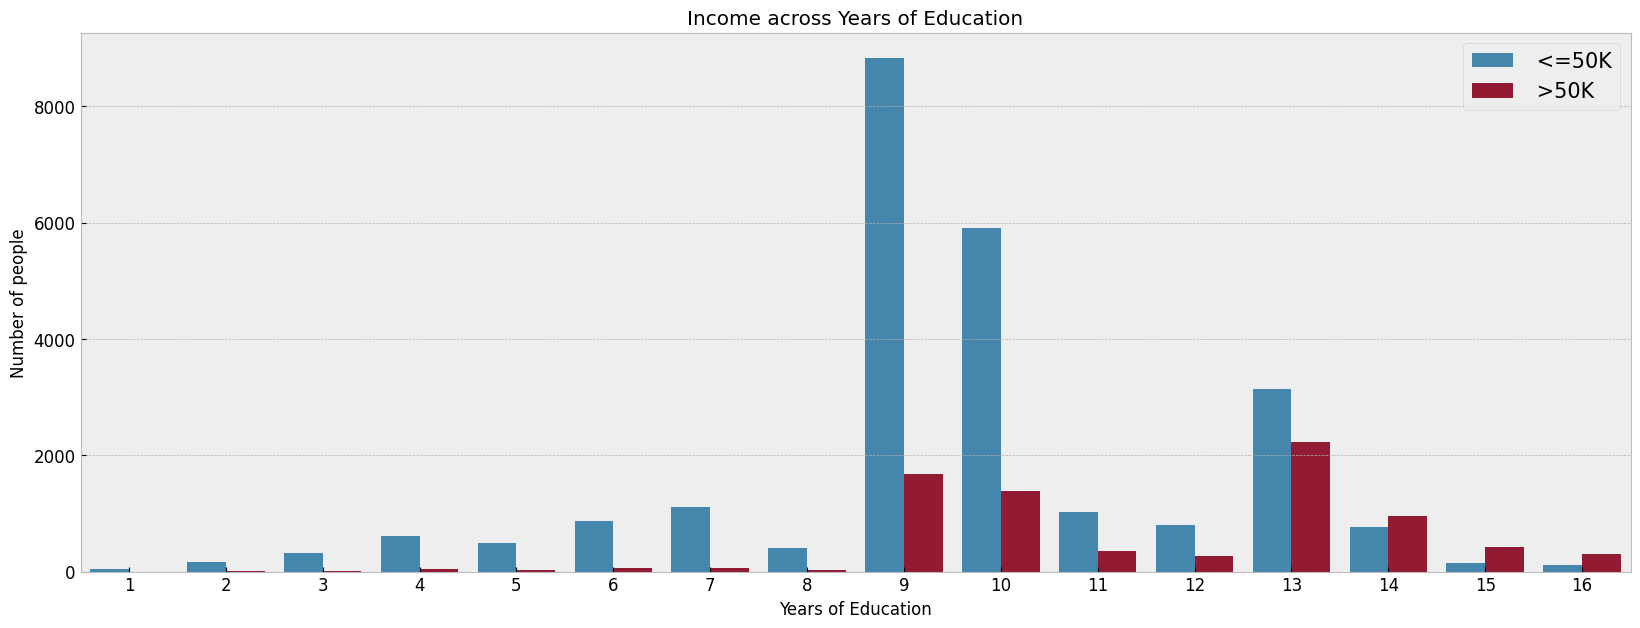

In [68]:

plt.figure(figsize=(20, 7))
sns.countplot(df['education_num'],hue=df['income'])
plt.title('Income across Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(prop={'size': 15})

plt.show()

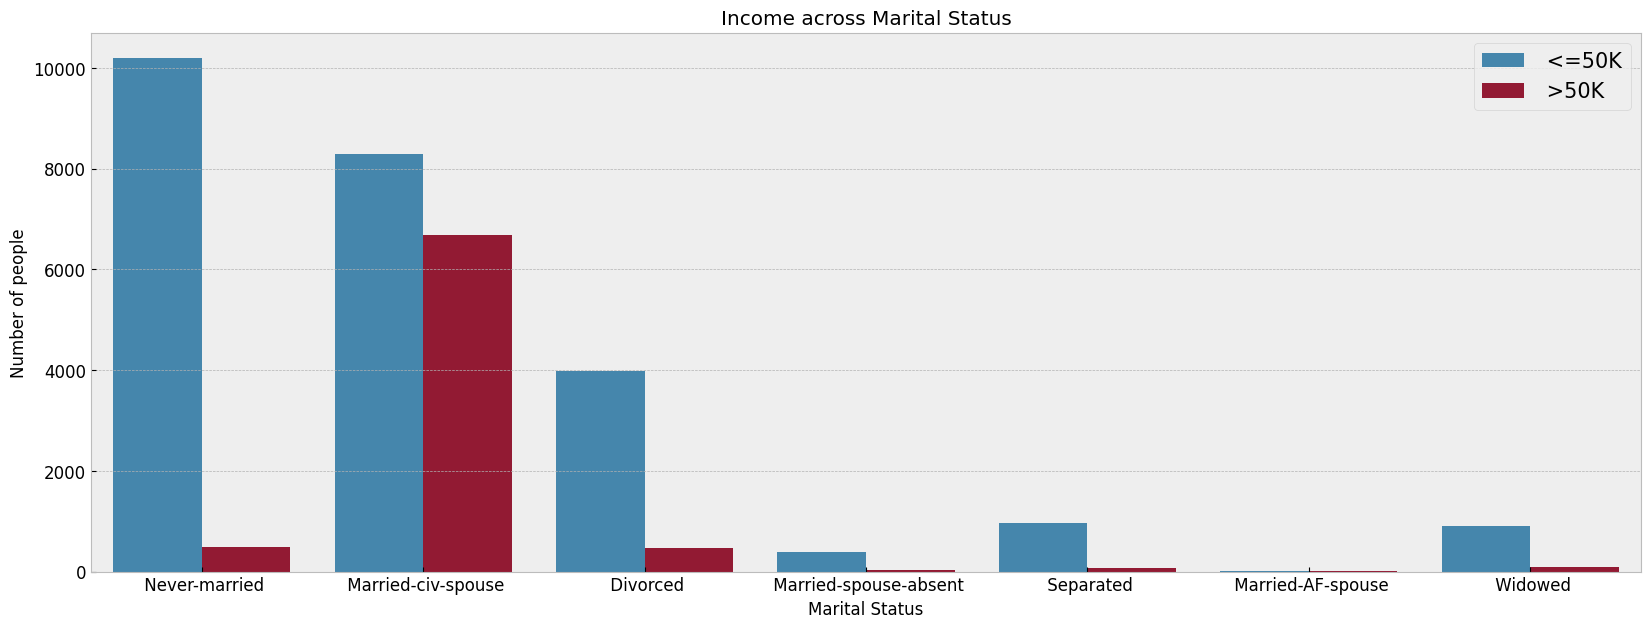

In [69]:

plt.figure(figsize=(20, 7))
sns.countplot(df['marital_status'], hue=df['income'])
plt.title('Income across Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(prop={'size': 15})
plt.show()

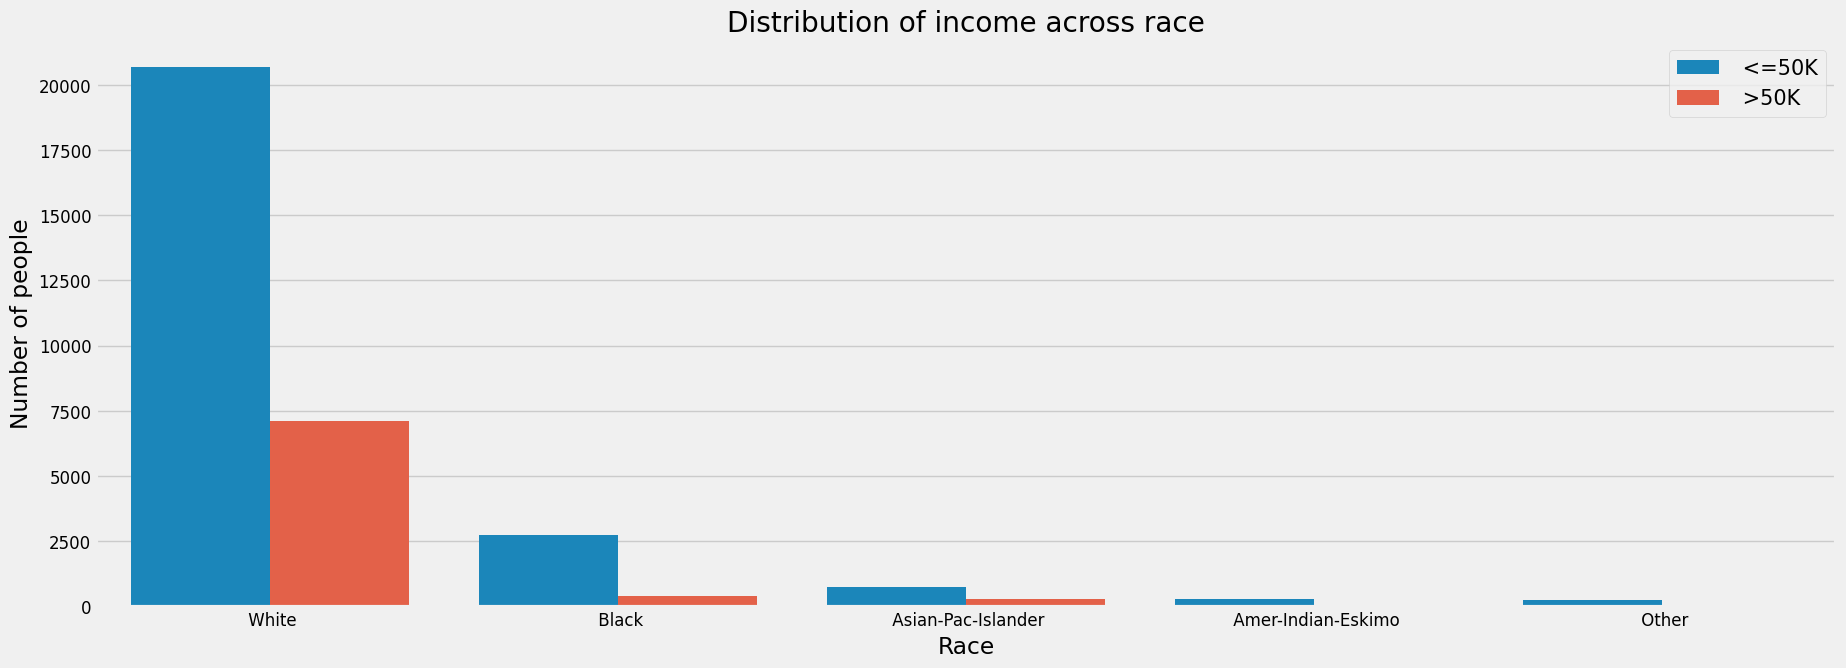

In [71]:

plt.figure(figsize=(20, 7))
sns.countplot(df['race'], hue=df['income'])
plt.title('Distribution of income across race')
plt.xlabel('Race')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(prop={'size': 15})
plt.show()

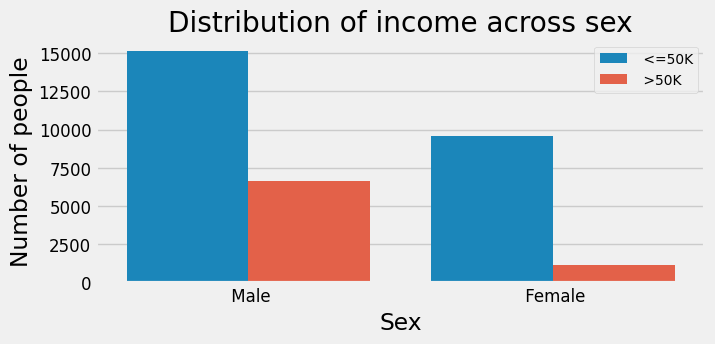

In [72]:
plt.figure(figsize=(7, 3))
sns.countplot(df['sex'], hue=df['income'])
plt.title('Distribution of income across sex')
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(prop={'size': 10})
plt.show()

<Figure size 1000x500 with 0 Axes>

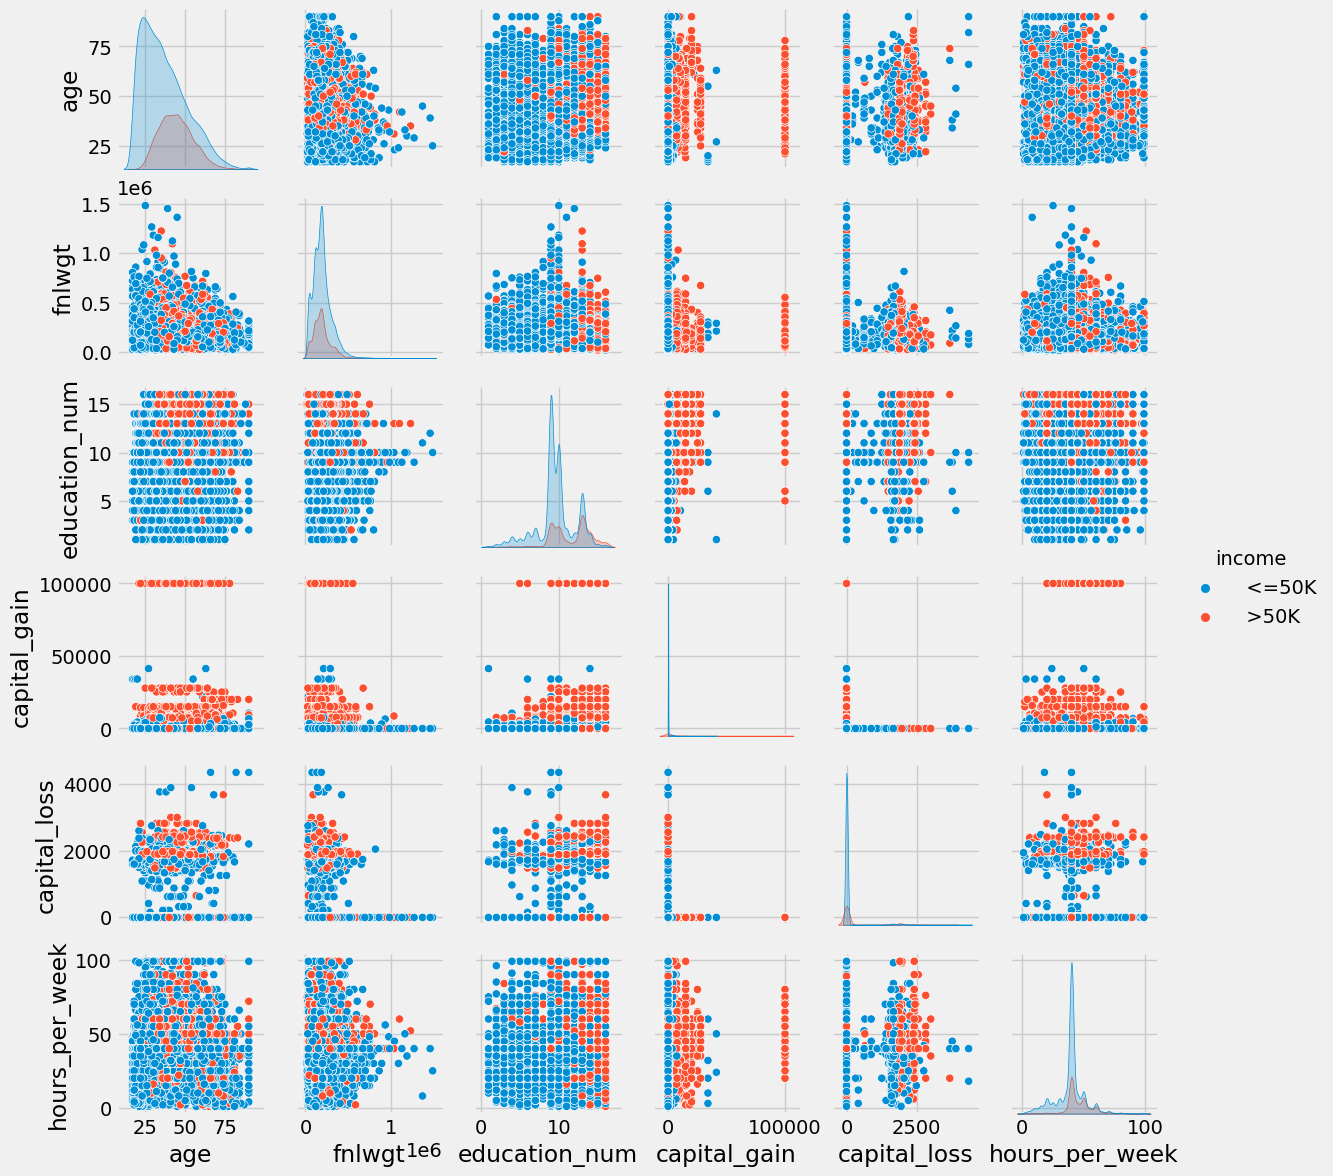

In [73]:
fig = plt.figure(figsize=(10,5))
sns.pairplot(df, hue='income', height=2)
plt.show()

In [4]:
names_col = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
             'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
             'hours_per_week', 'native_country', 'income']
df = pd.read_csv("datafiles/adult.data", names=names_col)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
y = df.income.replace({" <=50K": 0, " >50K": 1})
X = df.drop(["income"], axis= 1)

In [19]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

In [20]:
X

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [21]:
y.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [22]:
print(f"Percentage: {round(y.mean()*100, 2)}%")

Percentage: 24.08%


In [23]:
df['education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [24]:
numerical_features = X.select_dtypes(include="number")
categorical_features = X.select_dtypes(include="object")

In [25]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [27]:
numerical_features.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.85,
                                         0.90, 0.99])

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
1%,17.000000,2.718580e+04,3.000000,0.000000,0.000000,8.000000
5%,19.000000,3.946000e+04,5.000000,0.000000,0.000000,18.000000
10%,22.000000,6.571600e+04,7.000000,0.000000,0.000000,24.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000


In [28]:
def outlier_cap(x):
    x = x.clip(lower=x.quantile(0.01))
    x = x.clip(upper=x.quantile(0.99))
    return x

In [31]:
numerical_features = numerical_features.apply(lambda x: outlier_cap(x))

In [35]:
numerical_features.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.85,
                                         0.90, 0.99])

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.00000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.528331,188564.27689,10.088971,633.811400,83.800068,40.390406
std,13.481022,99738.04222,2.547541,2521.104326,382.955091,11.939226
min,17.000000,27185.80000,3.000000,0.000000,0.000000,8.000000
1%,17.000000,27186.52000,3.000000,0.000000,0.000000,8.000000
5%,19.000000,39460.00000,5.000000,0.000000,0.000000,18.000000
10%,22.000000,65716.00000,7.000000,0.000000,0.000000,24.000000
25%,28.000000,117827.00000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,178356.00000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,237051.00000,12.000000,0.000000,0.000000,45.000000


In [13]:
names_col = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
             'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
             'hours_per_week', 'native_country', 'income']
df = pd.read_csv("datafiles/adult.data", names=names_col)


#df = df.replace(to_replace=' ?', value='', inplace=True)
#df = df.replace(to_replace='?', value='', inplace=True)
#df.head()

In [14]:
df.replace(to_replace=' ?', value='', inplace=True)

In [15]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

NameError: name 'X' is not defined

In [17]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', '', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [294]:

workclass_categories = [' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', '', ' Self-emp-inc', ' Without-pay',
       ' Never-worked']

education_categories = [' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th']
marital_status_categories = [' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed']
occupation_categories = [' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', '', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv']

relationship_categories = [' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative']

race_categories = [' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',' Other']

sex_categories = [' Male', ' Female']

native_country_categories = [' United-States', ' Cuba', ' Jamaica', ' India', '', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands']

In [295]:
y = df.income.replace({" <=50K": 0, " >50K": 1})
X = df.drop(["income"], axis= 1)

In [296]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [297]:
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
16917,36,Private,182074,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States
31078,18,Private,141626,Some-college,10,Never-married,Tech-support,Own-child,White,Male,2176,0,20,United-States
14943,31,Private,214235,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,65,United-States
2658,49,Private,277434,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States
31540,61,,69285,HS-grad,9,Married-civ-spouse,,Husband,White,Male,0,0,37,United-States


In [298]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]
)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[workclass_categories,education_categories,marital_status_categories,occupation_categories,relationship_categories,race_categories,sex_categories,native_country_categories])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [299]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())

In [300]:
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [252]:
X_train.head()

,num_pipeline__age,num_pipeline__fnlwgt,num_pipeline__education_num,num_pipeline__capital_gain,num_pipeline__capital_loss,num_pipeline__hours_per_week,cat_pipeline__workclass,cat_pipeline__education,cat_pipeline__marital_status,cat_pipeline__occupation,cat_pipeline__relationship,cat_pipeline__race,cat_pipeline__sex,cat_pipeline__native_country
0,-0.184470,-0.073413,-0.433675,-0.146309,-0.217065,-0.036989,-0.252418,-0.702886,-0.866192,-0.782872,1.015855,-0.353194,-0.704642,-0.25452
1,-1.510861,-0.456592,-0.043314,0.149568,-0.217065,-1.658547,-0.252418,0.458817,-0.866192,1.586430,1.015855,-0.353194,-0.704642,-0.25452
2,-0.552912,0.231261,-0.433675,-0.146309,-0.217065,1.989959,-0.252418,-0.702886,-0.061831,-0.190546,-0.377667,-0.353194,-0.704642,-0.25452
3,0.773479,0.829970,-0.433675,-0.146309,-0.217065,0.773790,-0.252418,-0.702886,-0.061831,0.697942,-0.377667,-0.353194,-0.704642,-0.25452
4,1.657740,-1.141907,-0.433675,-0.146309,-0.217065,-0.280223,2.199543,-0.702886,-0.061831,1.882593,-0.377667,-0.353194,-0.704642,-0.25452


In [253]:
categorical_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [127]:
X_categorical_dum = pd.get_dummies(categorical_features, drop_first=True)
X_categorical_dum.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
X_all = pd.concat([X_categorical_dum, numerical_features], axis=1, join="inner")

print(f"Number of obsevations: {X_all.shape[0]}, Number of featues: {X_all.shape[1]}")

Number of obsevations: 32561, Number of featues: 100


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.25, random_state=42)

print(f"Amount of Train Samples: {len(X_train)} - Amount of Test Sample: {len(X_test)}")

Amount of Train Samples: 24420 - Amount of Test Sample: 8141


In [121]:
numerical = ['age', 'fnlwgt', 'education_num', 'hours_per_week']
scaler = MinMaxScaler()
scaler.fit(X_train[numerical])

MinMaxScaler()

In [130]:
numerical = ['age', 'fnlwgt', 'education_num', 'hours_per_week']

scaler = MinMaxScaler()
scaler.fit(X_train[numerical])

MinMaxScaler()

In [134]:
X_train[numerical] = scaler.transform(X_train[numerical])

In [135]:
X_test[numerical] = scaler.transform(X_test[numerical])

In [301]:
lgr_model = LogisticRegression(C=1.0, random_state=42)
lgr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [302]:
pred = lgr_model.predict(X_test)
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(f"Accuracy: {round(acc,4)}, F1-score: {round(f1, 4)}")

Accuracy: 0.8244, F1-score: 0.5438


In [303]:
results = cross_validate(lgr_model, X_train, y_train, cv=10, scoring=['accuracy', 'f1'], return_train_score=True)

In [304]:
print(f'Accuracy - train: {results["train_accuracy"].mean()}, | Validation: {results["test_accuracy"].mean()}')
print(f'F1-score - train: {results["train_f1"].mean()}, | Validation: {results["test_f1"].mean()}')

Accuracy - train: 0.825474821130514, | Validation: 0.8251136039968285
F1-score - train: 0.5557396406490602, | Validation: 0.5551045855884569
